In [10]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 確率的生成モデルとガウス過程

## 定義4.1（確率過程）
任意のN個の入力$\vec{x_1},...,\vec{x_N}$に対して，N個の出力値$\vec{f_N} = (f(\vec{x_1}) ,..., f(\vec{x_N}))$の同時確率$p(\vec{f_N}) = p(f(\vec{x_1}) ,..., f(\vec{x_N}))$を与えることができるとき，この関係$f(・)$を確率過程と呼ぶ．

## 定義4.2（ガウス過程）
確率過程$f(・)$が任意のN個の入力$\vec{x_1},...,\vec{x_N}$に対して，N個の出力値$\vec{f_N} = (f(\vec{x_1}) ,..., f(\vec{x_N}))$の同時確率$p(\vec{f_N}) = p(f(\vec{x_1}) ,..., f(\vec{x_N}))$がガウス分布に従うとき，この関係$f(・)$をガウス過程と呼ぶ．

## 混合ガウス分布
混合ガウス分布は，ガウス分布の重み付き和で表される確率分布です．
$$
p(\vec{t}\ |\ \vec{x}) = \sum_{k=1}^K \pi_k(\vec{x}) \mathcal{N}(\vec{t}\ |\ \vec{\mu}_k(\vec{x}), \Sigma_k(\vec{x}))
$$

以下にはjpdfの等高線を表示します．

$K = 3$

$ \mu_1 = (-1, 0), \mu_2 = (0, 1), \mu_3 = (1, -1)$

$\pi_1 = 0.4, \pi_2 = 0.3, \pi_3 = 0.3$

$$
\Sigma_1 =\begin{pmatrix} 0.2 & 0.1 \\ 0.1 & 0.2 \end{pmatrix}
$$
$$
\Sigma_2 =\begin{pmatrix} 0.2 & -0.1 \\ -0.1 & 0.2 \end{pmatrix}
$$
$$
\Sigma_3 =\begin{pmatrix} 0.4 & 0 \\ 0 & 0.2 \end{pmatrix}
$$

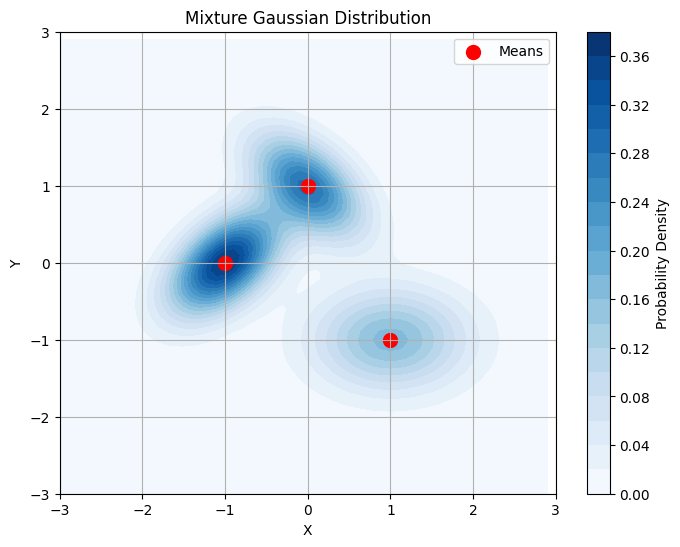

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 混合ガウス分布のパラメータ
num_components = 3
means = np.array([[-1, 0], [0, 1], [1, -1]])
covs = np.array([[[0.2, 0.1], [0.1, 0.2]], [[0.2, -0.1], [-0.1, 0.2]], [[0.4 , 0], [0, 0.2]]])
weights = np.array([0.4, 0.3, 0.3])

# プロット範囲の設定
x_min, x_max = -3, 3
y_min, y_max = -3, 3
grid_size = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_size), np.arange(y_min, y_max, grid_size))
grid = np.stack((xx, yy), axis=2)

# 混合ガウス分布の計算
pdf = np.zeros_like(xx)
for i in range(num_components):
    pdf += weights[i] * multivariate_normal.pdf(grid, mean=means[i], cov=covs[i])

# プロット
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, pdf, levels=20, cmap='Blues')
plt.colorbar(label='Probability Density')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='o', s=100, label='Means')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mixture Gaussian Distribution')
plt.legend()
plt.grid(True)
plt.show()

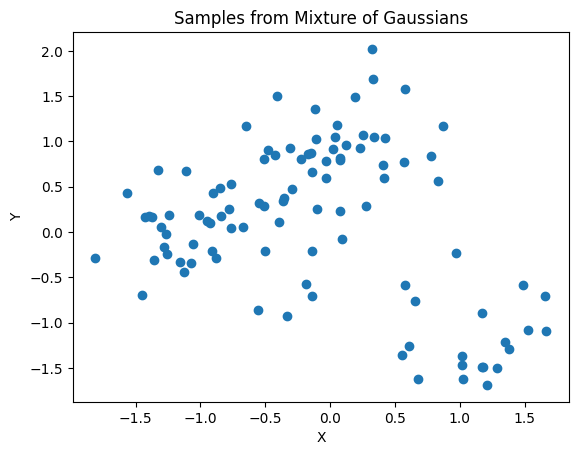

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 混合ガウス分布のパラメータ
num_components = 3
means = np.array([[-1, 0], [0, 1], [1, -1]])
covs = np.array([[[0.2, 0], [0, 0.2]], [[0.2, 0], [0, 0.2]], [[0.2, 0], [0, 0.2]]])
weights = np.array([0.4, 0.3, 0.3])

# サンプル生成
np.random.seed(0)
samples = []
for _ in range(100):
    component = np.random.choice(num_components, p=weights)
    sample = np.random.multivariate_normal(means[component], covs[component])
    samples.append(sample)
samples = np.array(samples)

# プロット
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Samples from Mixture of Gaussians')
plt.show()

## 例3（サイコロ・ダーツの連鎖的モデル）
サイコロを振って出た結果$d$でねらいを定める場所を決めるゲームのシミュレーション．

この場合，サイコロの出目は均等に出ると仮定すると
$$
p(d) = \frac{1}{6}
$$
となり，サイコロの出目がわかったときの条件付き分布は
$$
p(\vec{x}\ |\ d) = \mathcal{N}(\vec{x} |\ \vec{\mu}(d), \sigma^2 I)
$$
となる．よって，無条件における$\vec{x}$の分布は
$$
p(\vec{x}) = \sum_{d=1}^6 \frac{1}{6} \mathcal{N}(\vec{x} |\ \vec{\mu}(d), \sigma^2 I)
$$
となります．

以下では，これらのシミュレーションを行います．

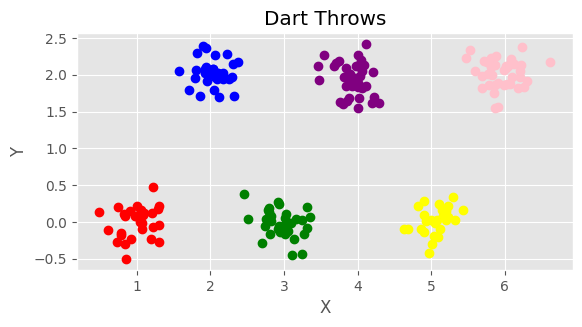

In [13]:
def throw_dart():
    dice_roll = np.random.randint(1, 7)  # サイコロを振る
    target_positions = {
        1: np.array([1, 0]),
        2: np.array([2, 2]),
        3: np.array([3, 0]),
        4: np.array([4, 2]),
        5: np.array([5, 0]),
        6: np.array([6, 2])
    }
    target_position = target_positions[dice_roll]  # 狙う位置を取得

    mean = target_position  # 平均は狙う位置
    variance = 0.2  # 分散（ガウスノイズの分散）

    dart_throw = np.random.normal(mean, variance)  # ガウスノイズを加えてダーツを放つ
    return dart_throw, dice_roll

colors = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'purple',
    5: 'yellow',
    6: 'pink'
}

# ダーツを200回投げる例
np.random.seed(0)  # 乱数のシードを設定して再現性を確保
throws = [throw_dart() for _ in range(200)]

# 結果の表示とプロット
fig, ax = plt.subplots()
ax.set_aspect('equal')

for i, (throw, dice_roll) in enumerate(throws):
    color = colors[dice_roll]
    ax.plot(throw[0], throw[1], 'o', color=color)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dart Throws')
plt.show()

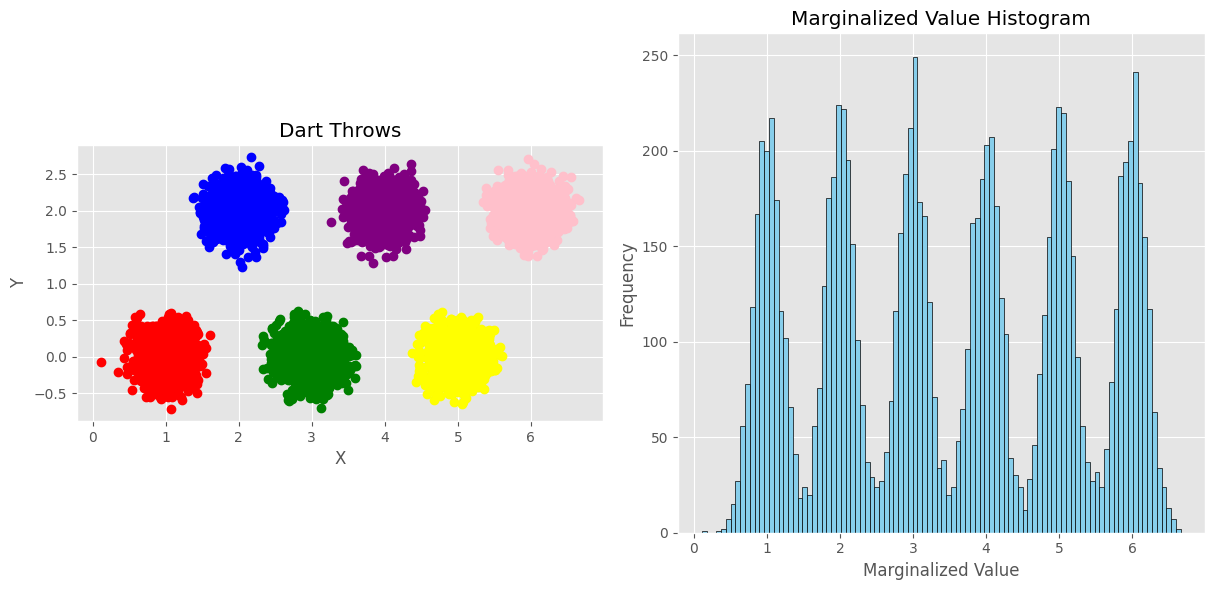

In [12]:
def throw_dart():
    dice_roll = np.random.randint(1, 7)  # サイコロを振る
    target_positions = {
        1: np.array([1, 0]),
        2: np.array([2, 2]),
        3: np.array([3, 0]),
        4: np.array([4, 2]),
        5: np.array([5, 0]),
        6: np.array([6, 2])
    }
    target_position = target_positions[dice_roll]  # 狙う位置を取得

    mean = target_position  # 平均は狙う位置
    variance = 0.2  # 分散（ガウスノイズの分散）

    dart_throw = np.random.normal(mean, variance)  # ガウスノイズを加えてダーツを放つ
    return dart_throw, dice_roll

# ダーツを1000回投げる例
np.random.seed(0)  # 乱数のシードを設定して再現性を確保
throws = [throw_dart() for _ in range(10000)]

# 結果の表示とプロット
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# ダーツの着地点をプロット
ax1.set_aspect('equal')

for throw, dice_roll in throws:
    color = colors[dice_roll]
    ax1.plot(throw[0], throw[1], 'o', color=color)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Dart Throws')

# 周辺化した値のヒストグラムをプロット
marginalized_values = np.array([throw[0] for throw, _ in throws])
ax2.hist(marginalized_values, bins=100, color='skyblue', edgecolor='black')
ax2.set_xlabel('Marginalized Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Marginalized Value Histogram')

plt.tight_layout()
plt.show()

## 確率的生成モデリング(probabilistic generative model)
確率的生成モデリングとは，観測される値の生成過程を確率分布で表現する作業のことです．

以下に抽象的だが手順を説明します．

### 1.未知の値を確率変数で表す(x , d)
### 2.ここの値が生成される確率的な過程をそれぞれ確率分布で表す(p(d) , p(x|d)
### 3.すべての確率変数の同時分布を表す(p(x,d) = p(d)p(x|d)
### 4.必要な周辺分布を求める(p(x))

## 例4（ガウス過程回帰モデル）
$\vec{y}$の生成過程は，以下のような連鎖的事象です．
$$
\vec{f}\ \ \ 〜\ \mathcal{N}(\vec{\mu}, K)
$$
$$
\vec{y}|\vec{f}\ 〜\ \mathcal{N}(\vec{f}, \sigma^2 I)
$$

関数出力$\vec{f_N} = (f(\vec{x_1}) ,..., f(\vec{x_N}))$はガウス分布 $\mathcal{N}(\vec{\mu}, K)$に従います．

そこで周辺化を行い，$\vec{y}$の予測分布を求めます．


# グラフィカルモデル(graphical model)
グラフィカルモデルとは，確率的生成モデルをグラフで表現したものです．

教科書の図4.4を参考にグラフィカルモデルの書き方を学びましょう．

# 最尤推定とベイズ推定
## 確率生成モデルと最尤推定
確率生成モデルとは，『現実世界における観測$Y$は，何らかの確率分布$p(Y)$からのサンプリング$Y~p(Y)$によって得られたものだ』と仮説することとあります．

例3のサイコロ・ダーツの連鎖的モデルを例にとって最尤法をしてみましょう．(例12)

## 確率生成モデルとベイズ推定
ベイズ推定は『知りたいもの（パラメータ$\theta$）は確率変数だ』と考えます．

また，ベイズ推定において未知のパラメータ$\theta$の「推定」とは，観測$X$を得ることによって確率変数$\theta$の分布を更新することだと考えます．

例13を通してベイズ推定を実感しましょう．

# 確率分布の表現
## ノンパラメトリックモデル
パラメトリックな方法とは，ある確率分布のパラメータを推定する方法です．すなわち，パラメータを数値的に求めることがすなわち確率分布を推定することだと考えます．

ノンパラメトリックな方法とは，パラメータを数値的に求めることなく確率分布を推定する方法です．

典型例として，ヒストグラムを求める方法やカーネル密度推定，K近傍法などがあります．

ガウス過程法も，ノンパラメトリックな方法のひとつで，推定対象となる未知の関数$f(x)$の確率分布としていかなるパラメトリックな確率密度関数も仮定していないからです．

資料の最初に紹介した混合ガウス分布からのサンプルを再度記載します．



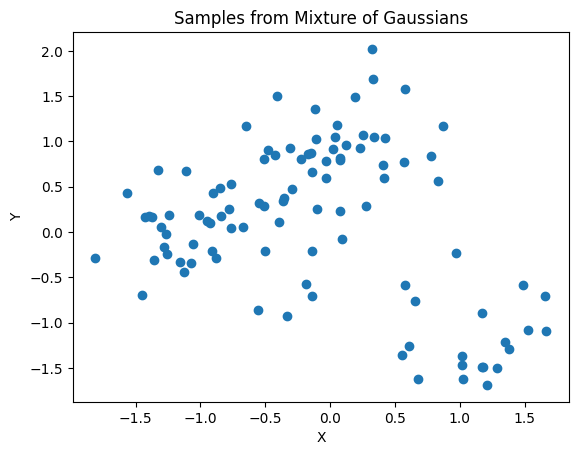

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 混合ガウス分布のパラメータ
num_components = 3
means = np.array([[-1, 0], [0, 1], [1, -1]])
covs = np.array([[[0.2, 0], [0, 0.2]], [[0.2, 0], [0, 0.2]], [[0.2, 0], [0, 0.2]]])
weights = np.array([0.4, 0.3, 0.3])

# サンプル生成
np.random.seed(0)
samples = []
for _ in range(100):
    component = np.random.choice(num_components, p=weights)
    sample = np.random.multivariate_normal(means[component], covs[component])
    samples.append(sample)
samples = np.array(samples)

# プロット
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Samples from Mixture of Gaussians')
plt.show()

このサンプルから，あなたはどの様な確率分布が生成されたのかを推定することができますか？

正解は，混合ガウス分布であるのはわかっていますが，知らない人からするとそのことをプロットからは推測できないでしょう．

## 確率分布を標本で表現する

## 例14：（解析的な形で書き表せない確率分布の可視化）
$$
d 〜\textbf{Unif}(-10,10)
$$
$$
\vec{x}|\vec{d}〜N(\vec{d}, \sigma^2)
$$
ただし，$\vec{d} = (d , 0)^{\top}$
という確率生成モデルを考えます．

$x$の分布は
$$
p(x) = \sigma \left\{\Phi\left(\frac{1-x}{\sigma}\right) - \Phi\left(\frac{-1-x}{\sigma}\right)\right\}
$$

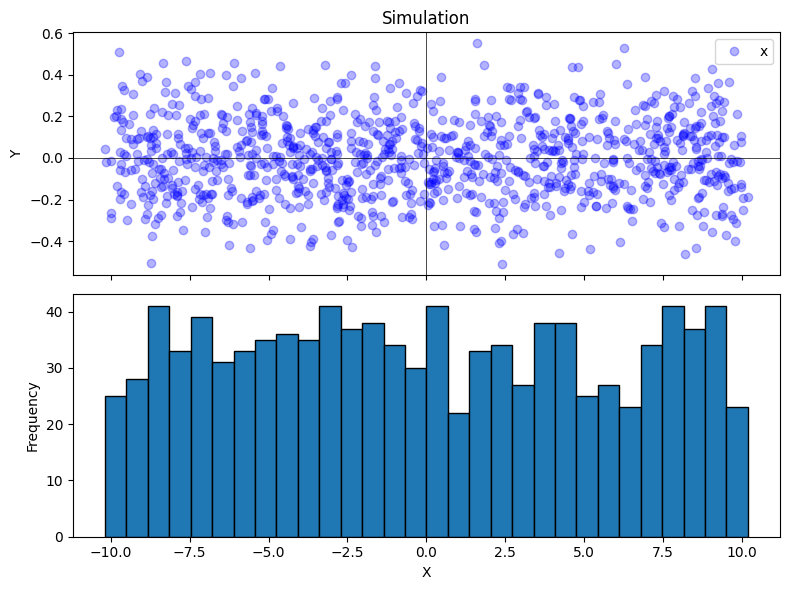

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# パラメータの設定
sigma = 0.2  # 分散
num_simulations = 1000  # シミュレーション回数

# シミュレーション
np.random.seed(0)
d = np.random.uniform(-10, 10, num_simulations)
d_vec = np.zeros((num_simulations, 2))
d_vec[:, 0] = d
x = np.random.normal(d_vec, sigma)

# 結果の表示とプロット
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 6))

ax1.plot(x[:, 0], x[:, 1], 'bo', alpha=0.3, label='x')
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.set_ylabel('Y')
ax1.set_title('Simulation')
ax1.legend()

ax2.hist(x[:, 0], bins=30, edgecolor='black')
ax2.set_xlabel('X')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 例15（解析的な形で書き表せない確率分布に関するベイズ推定）
先程の生成モデルにおいて$\sigma$が未知であるとします．

そこで$\sigma$の事前分布を
$$
p(\sigma^2) = \textbf{Unif}(0.1,2)
$$
として，標本$\vec{x}$から$\sigma^2$の事後分布を計算しましょう．

## 例16（カーネル密度推定）
カーネル密度推定法は，確率分布推定のための最も簡単な方法の1つで，ノンパラメトリックな方法です．

B個の標本$\vec{x} = (x_1, ..., x_B)$が得られたとします．これを用いて，密度関数の推定値$\hat{p}(x)$を以下のように求めることができます．
$$
\hat{p}(x) = \frac{1}{K}\sum_{k=1}^K h_k(x)
$$
ここで，$h_k(x) \ge 0 , k=1,...,K$はk番目の基底関数であり，正規化されているものとします．

特にカーネル密度推定では，B個の標本それぞれに対して基底関数を以下の様に定めた場合をいいます．
$$
h_b (x) = h \left(\frac{x_b - x}{\sigma} \right)
$$
ここで，$h(x)$は正値を取る任意の関数であり，カーネル関数と呼びます．$\sigma$はバンド幅と呼ばれる基底の半径を制御します．

公式ページ：https://docs.scipy.org/doc/scipy/reference/stats.html

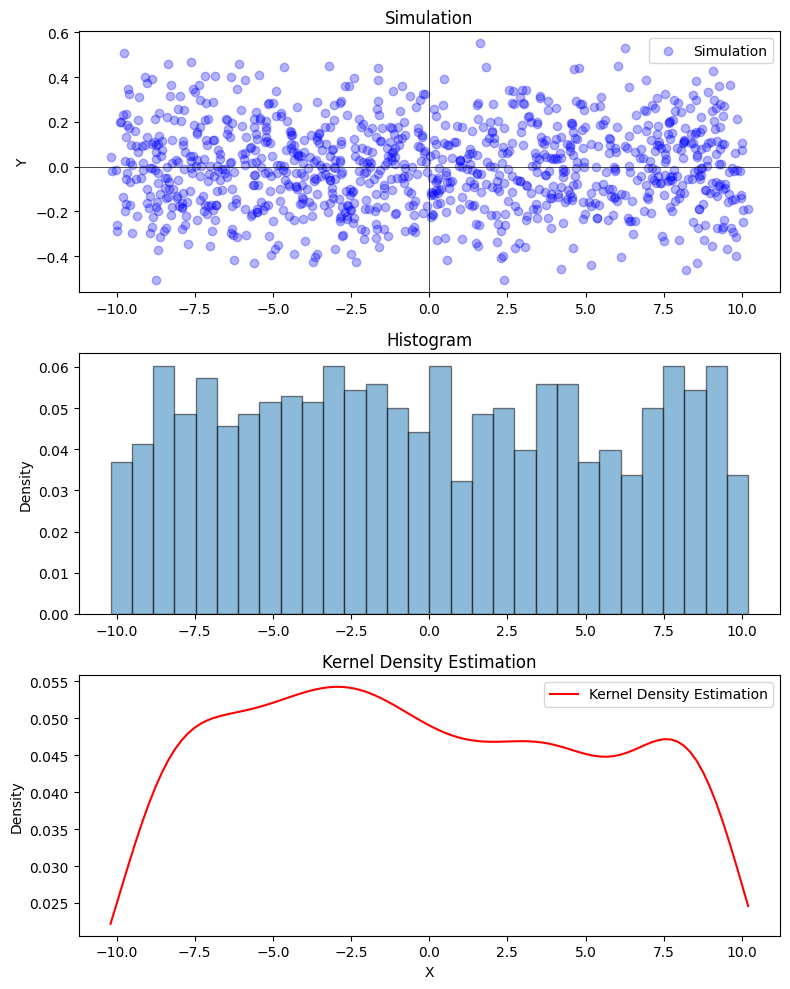

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
'''
修正したコードでは、scipy.statsモジュールのgaussian_kde関数を使用してカーネル密度推定を行います。
gaussian_kde関数にデータセットのX軸の値を渡すことで、カーネル密度推定の結果を得ることができます。
'''

# パラメータの設定
sigma = 0.2  # 分散
num_simulations = 1000  # シミュレーション回数

# シミュレーション
np.random.seed(0)
d = np.random.uniform(-10, 10, num_simulations)
d_vec = np.zeros((num_simulations, 2))
d_vec[:, 0] = d
x = np.random.normal(d_vec, sigma)

# カーネル密度推定の実行
kde = gaussian_kde(x[:, 0])

# プロット
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# シミュレーション結果のプロット
ax1.scatter(x[:, 0], x[:, 1], c='blue', alpha=0.3, label='Simulation')
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.set_ylabel('Y')
ax1.set_title('Simulation')
ax1.legend()

# 元データのヒストグラムのプロット
ax2.hist(x[:, 0], bins=30, density=True, alpha=0.5, edgecolor='black')
ax2.set_ylabel('Density')
ax2.set_title('Histogram')

# カーネル密度推定の結果のプロット
x_vals = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)
y_vals = kde(x_vals)
ax3.plot(x_vals, y_vals, 'r-', label='Kernel Density Estimation')
ax3.set_xlabel('X')
ax3.set_ylabel('Density')
ax3.set_title('Kernel Density Estimation')
ax3.legend()

plt.tight_layout()
plt.show()

## 例17（ニューラルネットワークを用いた分布推定法）